# Tensorflow introduction

Tensorflow is an open-source software library for dataflow programming across a range of tasks. It is a symbolic math library, and also used for machine learning applications such as neural networks. Here we try to introduce it using some easy elementry examples.

In [1]:
%matplotlib inline

import numpy as np
import pylab as plt
import tensorflow as tf

params = {'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

/home/gf/packages/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


You can define constant in different format like:

In [2]:
node1 = tf.constant(3.0, dtype=tf.float32)
node2 = tf.constant(4.0) # also tf.float32 implicitly
print(node1)
print(node2)

Tensor("Const:0", shape=(), dtype=float32)
Tensor("Const_1:0", shape=(), dtype=float32)


As mentioned before, tnesorflow is a C basec packages which has python interface. For calculation you should open a tensorflow session like:

In [3]:
with tf.Session() as sess:
    print(sess.run([node1, node2]))

[3.0, 4.0]


For example if you want to add two number using tensorflow, you can make the data flow through operations (here addition) then you have to open a session (here by with command) and run it like:

In [4]:
node3 = tf.add(node1, node2)
with tf.Session() as sess:
    print(sess.run(node3))

7.0


In [5]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
# adder_node = tf.add(a, b)
adder_node = a + b
with tf.Session() as sess:
    print(sess.run(adder_node, {a: 3, b:4.5}))
    print(sess.run(adder_node, {a: [1,3], b: [2, 4]}))

7.5
[3. 7.]


Or you can define more complicated precedures:

In [6]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
c = tf.placeholder(tf.float32)
adder_node = (a + b)*c
with tf.Session() as sess:
    print(sess.run(adder_node, {a: 3, b:4.5, c:2}))
    

15.0


Sinse almost every Machine learning problem is based on optimization, let's try to solve an optimization problem. For this pupose assume that there are an input set "x_train" which we want to find a simple linear model <br>
$y=W\times x+b$ <br>
to predict "y_train" vector. 

In [7]:
x_train = [1,2,3,4]
y_train = [0,-1,-2,-3]

W = tf.Variable([.3], dtype=tf.float32)
b = tf.Variable([-.3], dtype=tf.float32)
x = tf.placeholder(tf.float32)
linear_model = W * x + b
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    print(sess.run(linear_model, {x:x_train}))

[0.         0.3        0.6        0.90000004]


In [8]:
W = tf.Variable([.3], dtype=tf.float32)
b = tf.Variable([-.3], dtype=tf.float32)
x = tf.placeholder(tf.float32)
linear_model = W * x + b

y = tf.placeholder(tf.float32)
squared_deltas = tf.square(linear_model - y)
loss = tf.reduce_sum(squared_deltas)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    print(sess.run(loss, {x:x_train, y:y_train}))

23.660002


In [9]:
W = tf.Variable([.3], dtype=tf.float32)
b = tf.Variable([-.3], dtype=tf.float32)
x = tf.placeholder(tf.float32)
linear_model = W * x + b

y = tf.placeholder(tf.float32)
squared_deltas = tf.square(linear_model - y)
loss = tf.reduce_sum(squared_deltas)

optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for i in range(1000):
        sess.run(train, {x:x_train, y:y_train})

    print(sess.run([W, b]))

[array([-0.9999969], dtype=float32), array([0.9999908], dtype=float32)]


In [10]:
# evaluate training accuracy
with tf.Session() as sess:
    sess.run(init)
    for i in range(1000):
        sess.run(train, {x:x_train, y:y_train})
        
    curr_W, curr_b, curr_loss = sess.run([W, b, loss], {x:x_train, y:y_train})
    print("W: %s b: %s loss: %s"%(curr_W, curr_b, curr_loss))

W: [-0.9999969] b: [0.9999908] loss: 5.6999738e-11


# Example

In [11]:
with np.load('./datasets/mnist.npz', allow_pickle=True) as f:
    x_train, y_train = f['x_train'], f['y_train']
    x_test, y_test = f['x_test'], f['y_test']
    print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

x_train, x_test = x_train / 255.0, x_test / 255.0

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))


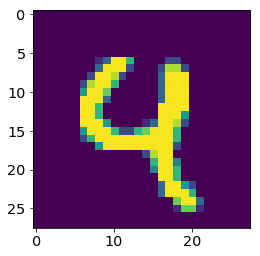

In [12]:
plt.imshow(x_train[np.random.randint(len(x_train))])

In [13]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 17s 286us/step - loss: 0.2174 - acc: 0.9359
Epoch 2/5
60000/60000 [==============================] - 13s 223us/step - loss: 0.0974 - acc: 0.9699
Epoch 3/5
60000/60000 [==============================] - 14s 235us/step - loss: 0.0681 - acc: 0.9783
Epoch 4/5
60000/60000 [==============================] - 12s 206us/step - loss: 0.0522 - acc: 0.9829
Epoch 5/5
60000/60000 [==============================] - 13s 211us/step - loss: 0.0433 - acc: 0.9854


In [15]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 48us/step


[0.06757630117256194, 0.9797]

Text(0,0.5,'acc')

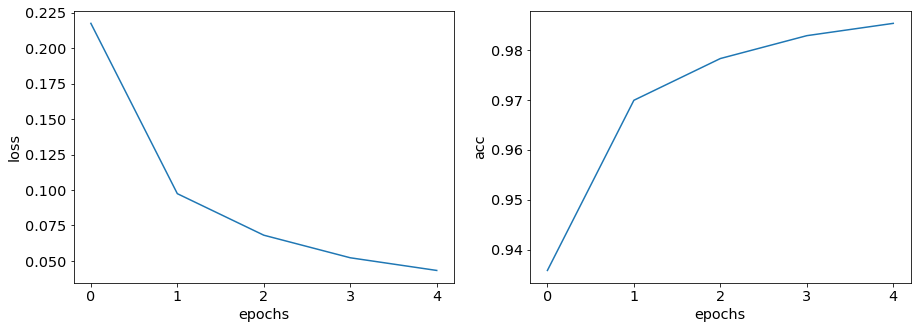

In [16]:
hist = model.history

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

ax1.plot(hist.epoch,hist.history['loss'])
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')

ax2.plot(hist.epoch,hist.history['acc'])
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')

In [17]:
n_train = 50000

with np.load('./datasets/Hoda_data.npz', allow_pickle=True) as f:
    print (f['img'].shape,f['target'].shape)
    x_train, y_train = f['img'][:n_train], f['target'][:n_train]
    x_test, y_test = f['img'][n_train:], f['target'][n_train:]
    print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)
    


((80000, 32, 32), (80000, 10))
((50000, 32, 32), (50000, 10), (30000, 32, 32), (30000, 10))


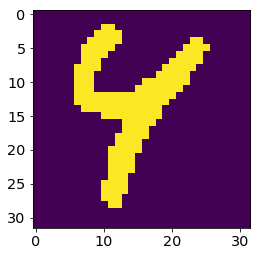

In [18]:
plt.imshow(x_train[0])